In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Introduction

The project we are going to predict the loans whether fully paid off or charged off. 

### Data Cleaning & EDA

In [2]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
df.shape

(2260701, 151)

In [5]:
keep_list=['loan_amnt','term','int_rate','installment','sub_grade','emp_length','home_ownership','annual_inc',\
           'verification_status','issue_d','loan_status','purpose','addr_state','dti','earliest_cr_line','fico_range_low',\
          'fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type',\
          'mort_acc','pub_rec_bankruptcies']

In [6]:
len(keep_list)

26

Due to 151 columns, that means the data have 151 variables. After checking the meaning of the variables, our team believes that the following variables can be useful to established as a model better to predict whether the loan will be paid off.

In [7]:
drop_list=[col for col in df.columns if col not in keep_list]
print(drop_list)

['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'grade', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths

In [8]:
df.drop(labels = drop_list, axis=1, inplace = True)

In [9]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

The term "charge off" means that the original creditor has given up on being repaid according to the original terms of the loan. 

In [10]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   sub_grade             1345310 non-null  object 
 5   emp_length            1266799 non-null  object 
 6   home_ownership        1345310 non-null  object 
 7   annual_inc            1345310 non-null  float64
 8   verification_status   1345310 non-null  object 
 9   issue_d               1345310 non-null  object 
 10  loan_status           1345310 non-null  object 
 11  purpose               1345310 non-null  object 
 12  addr_state            1345310 non-null  object 
 13  dti                   1344936 non-null  float64
 14  earliest_cr_line      1345310 non-

#### Missing values

In [11]:
for col in df.columns:
    pct_missing =df[col].isnull().mean()
    print('{}-{}%'.format(col, round(pct_missing*100,2)))

loan_amnt-0.0%
term-0.0%
int_rate-0.0%
installment-0.0%
sub_grade-0.0%
emp_length-5.84%
home_ownership-0.0%
annual_inc-0.0%
verification_status-0.0%
issue_d-0.0%
loan_status-0.0%
purpose-0.0%
addr_state-0.0%
dti-0.03%
earliest_cr_line-0.0%
fico_range_low-0.0%
fico_range_high-0.0%
open_acc-0.0%
pub_rec-0.0%
revol_bal-0.0%
revol_util-0.06%
total_acc-0.0%
initial_list_status-0.0%
application_type-0.0%
mort_acc-3.51%
pub_rec_bankruptcies-0.05%


In [12]:
pd.set_option('max_colwidth',100)
df_lack_only = df[df.isnull().values == True]
df_lack_only.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
75,1500.0,36 months,6.49,45.97,A2,NaN,MORTGAGE,45000.0,Not Verified,Dec-2015,Fully Paid,vacation,HI,16.11,Dec-1987,745.0,749.0,12.0,0.0,3717.0,21.2,37.0,w,Individual,4.0,0.0
93,15000.0,36 months,5.32,451.73,A1,NaN,RENT,80000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,VA,20.18,Apr-1993,775.0,779.0,30.0,0.0,41593.0,21.4,47.0,w,Individual,2.0,0.0
139,25000.0,36 months,7.49,777.55,A4,NaN,MORTGAGE,132000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,MI,13.83,Aug-1974,745.0,749.0,14.0,0.0,33231.0,48.0,32.0,w,Individual,3.0,0.0
141,2500.0,36 months,11.48,82.42,B5,NaN,RENT,16488.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,CT,38.06,Nov-2005,770.0,774.0,12.0,0.0,2469.0,8.2,18.0,w,Individual,0.0,0.0
145,15000.0,36 months,7.49,466.53,A4,NaN,MORTGAGE,45000.0,Verified,Dec-2015,Fully Paid,debt_consolidation,CA,10.67,Jan-1993,710.0,714.0,10.0,0.0,16173.0,43.5,20.0,w,Individual,2.0,0.0


In [13]:
print('There is {} missing values'.format(len(df_lack_only)))
print('There is {}% missing values'.format(round(len(df_lack_only)/len(df)*100,2)))

There is 127720 missing values
There is 9.49% missing values


Since the missing values cannot be filled in by other variables, and the proportion of missing values is 9.49%, we decided to delete the missing values directly.

In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

#### Check the duplicated values

In [16]:
duplicate = df[df.duplicated()]
duplicate.count().sum()

0

#### Check the outliers

In [17]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06,1.220092e+06
mean,1.471203e+04,1.327424e+01,4.467739e+02,7.819650e+04,1.830400e+01,6.954463e+02,6.994464e+02,1.176297e+01,2.150272e-01,1.654611e+04,5.212039e+01,2.518240e+01,1.662856e+00,1.328375e-01
std,8.764865e+03,4.796682e+00,2.631637e+02,7.133765e+04,9.619634e+00,3.131821e+01,3.131884e+01,5.508714e+00,6.064060e-01,2.275267e+04,2.433418e+01,1.202389e+01,1.996019e+00,3.768980e-01
min,1.000000e+03,5.310000e+00,4.930000e+00,3.300000e+01,-1.000000e+00,6.600000e+02,6.640000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.553000e+02,4.800000e+04,1.191000e+01,6.700000e+02,6.740000e+02,8.000000e+00,0.000000e+00,6.113000e+03,3.400000e+01,1.600000e+01,0.000000e+00,0.000000e+00
50%,1.250000e+04,1.274000e+01,3.826300e+02,6.500000e+04,1.769000e+01,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,1.135100e+04,5.250000e+01,2.300000e+01,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.602000e+01,5.930600e+02,9.300000e+04,2.414000e+01,7.100000e+02,7.140000e+02,1.500000e+01,0.000000e+00,2.006925e+04,7.090000e+01,3.200000e+01,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,8.450000e+02,8.500000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,5.100000e+01,1.200000e+01


Text(0.5, 1.0, 'Check the outliers')

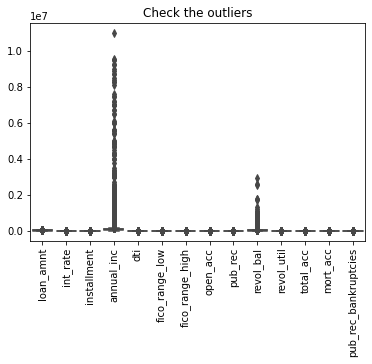

In [18]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Check the outliers')

In [19]:
upper_list=['annual_inc','revol_bal']
def standardization(df):
    df_std = df.copy(deep=True)
    for column in upper_list:
        df_std[column] = (df_std[column]-df_std[column].mean())/df_std[column].std()
    return df_std

Based on the distribution of data where mean is 0 and standard deviation is 1.

In [20]:
df_std = standardization(df)
df_melted = pd.melt(frame=df_std,id_vars='loan_status',value_vars=upper_list,var_name='features',value_name='value',col_level=None)

Text(0.5, 1.0, 'Double Check the outliers')

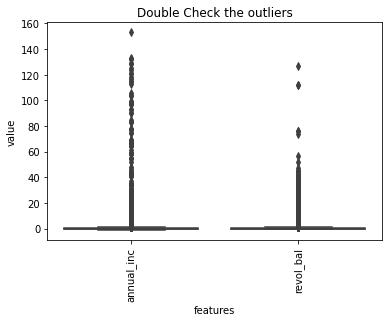

In [21]:
sns.boxplot(x='features',y='value', data=df_melted)
plt.xticks(rotation=90)
plt.title('Double Check the outliers')

In [22]:
out_list=['annual_inc','revol_bal']
out_range = pd.DataFrame(index=['lower','upper'])
for each in out_list:
    mean = np.mean(df[each])
    std = np.std(df[each])
    lower_range = mean-2*std
    upper_range = mean+2*std
    out_range[each]=[lower_range,upper_range]
annual_filter = (df['annual_inc']>out_range['annual_inc'][1]) | (df['annual_inc']<out_range['annual_inc'][0])
revol_filter = (df['revol_bal']>out_range['revol_bal'][1]) | (df['revol_bal']<out_range['revol_bal'][0])

In [23]:
Outlier_filter = (annual_filter | revol_filter)
df_outliers = df[Outlier_filter]
print('There is {} outliers'.format(df[Outlier_filter]['loan_status'].count()))
print('There is {}% outliers'.format(round(len(df[Outlier_filter])/len(df)*100,2)))

There is 44118 outliers
There is 3.62% outliers


In [24]:
# Remove the outliers
df = df[~Outlier_filter]

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,Aug-2003,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,Dec-1999,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,Aug-2000,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60 months,22.45,289.91,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,Jun-1998,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,Oct-1987,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


### Feature Engineering

#### Change the data type from object to date.

In [26]:
df['issue_d']=pd.to_datetime(df.issue_d)

In [27]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [28]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000,1175974.000000
mean,14373.612406,13.317964,436.739187,72424.467265,18.352840,1999.247120,695.075724,699.075843,11.655576,0.217594,14060.553960,51.846608,24.937087,1.601724,0.136514
std,8532.562609,4.786323,255.514263,35310.170414,9.615636,7.242966,31.190376,31.190946,5.447465,0.605311,11156.689922,24.231450,11.934034,1.946310,0.381522
min,1000.000000,5.310000,4.930000,33.000000,-1.000000,1934.000000,660.000000,664.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,9.750000,252.140000,47000.000000,12.000000,1995.000000,670.000000,674.000000,8.000000,0.000000,5978.000000,33.800000,16.000000,0.000000,0.000000
50%,12000.000000,12.790000,376.210000,65000.000000,17.740000,2000.000000,690.000000,694.000000,11.000000,0.000000,10997.000000,52.100000,23.000000,1.000000,0.000000
75%,20000.000000,16.020000,575.250000,90000.000000,24.160000,2004.000000,710.000000,714.000000,14.000000,0.000000,18999.000000,70.400000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1719.830000,220842.000000,999.000000,2015.000000,845.000000,850.000000,88.000000,86.000000,62051.000000,892.300000,176.000000,51.000000,12.000000


In [29]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.000000,36 months,13.990000,123.030000,C4,10+ years,MORTGAGE,55000.000000,Not Verified,2015-12-01,Fully Paid,debt_consolidation,PA,5.910000,2003,675.000000,679.000000,7.000000,0.000000,2765.000000,29.700000,13.000000,w,Individual,1.000000,0.000000
1,24700.000000,36 months,11.990000,820.280000,C1,10+ years,MORTGAGE,65000.000000,Not Verified,2015-12-01,Fully Paid,small_business,SD,16.060000,1999,715.000000,719.000000,22.000000,0.000000,21470.000000,19.200000,38.000000,w,Individual,4.000000,0.000000
2,20000.000000,60 months,10.780000,432.660000,B4,10+ years,MORTGAGE,63000.000000,Not Verified,2015-12-01,Fully Paid,home_improvement,IL,10.780000,2000,695.000000,699.000000,6.000000,0.000000,7869.000000,56.200000,18.000000,w,Joint App,5.000000,0.000000
4,10400.000000,60 months,22.450000,289.910000,F1,3 years,MORTGAGE,104433.000000,Source Verified,2015-12-01,Fully Paid,major_purchase,PA,25.370000,1998,695.000000,699.000000,12.000000,0.000000,21929.000000,64.500000,35.000000,w,Individual,6.000000,0.000000
5,11950.000000,36 months,13.440000,405.180000,C3,4 years,RENT,34000.000000,Source Verified,2015-12-01,Fully Paid,debt_consolidation,GA,10.200000,1987,690.000000,694.000000,5.000000,0.000000,8822.000000,68.400000,6.000000,w,Individual,0.000000,0.000000


In [30]:
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

### Encode categorical variables

Text(0.5, 1.0, 'Correlation each variables')

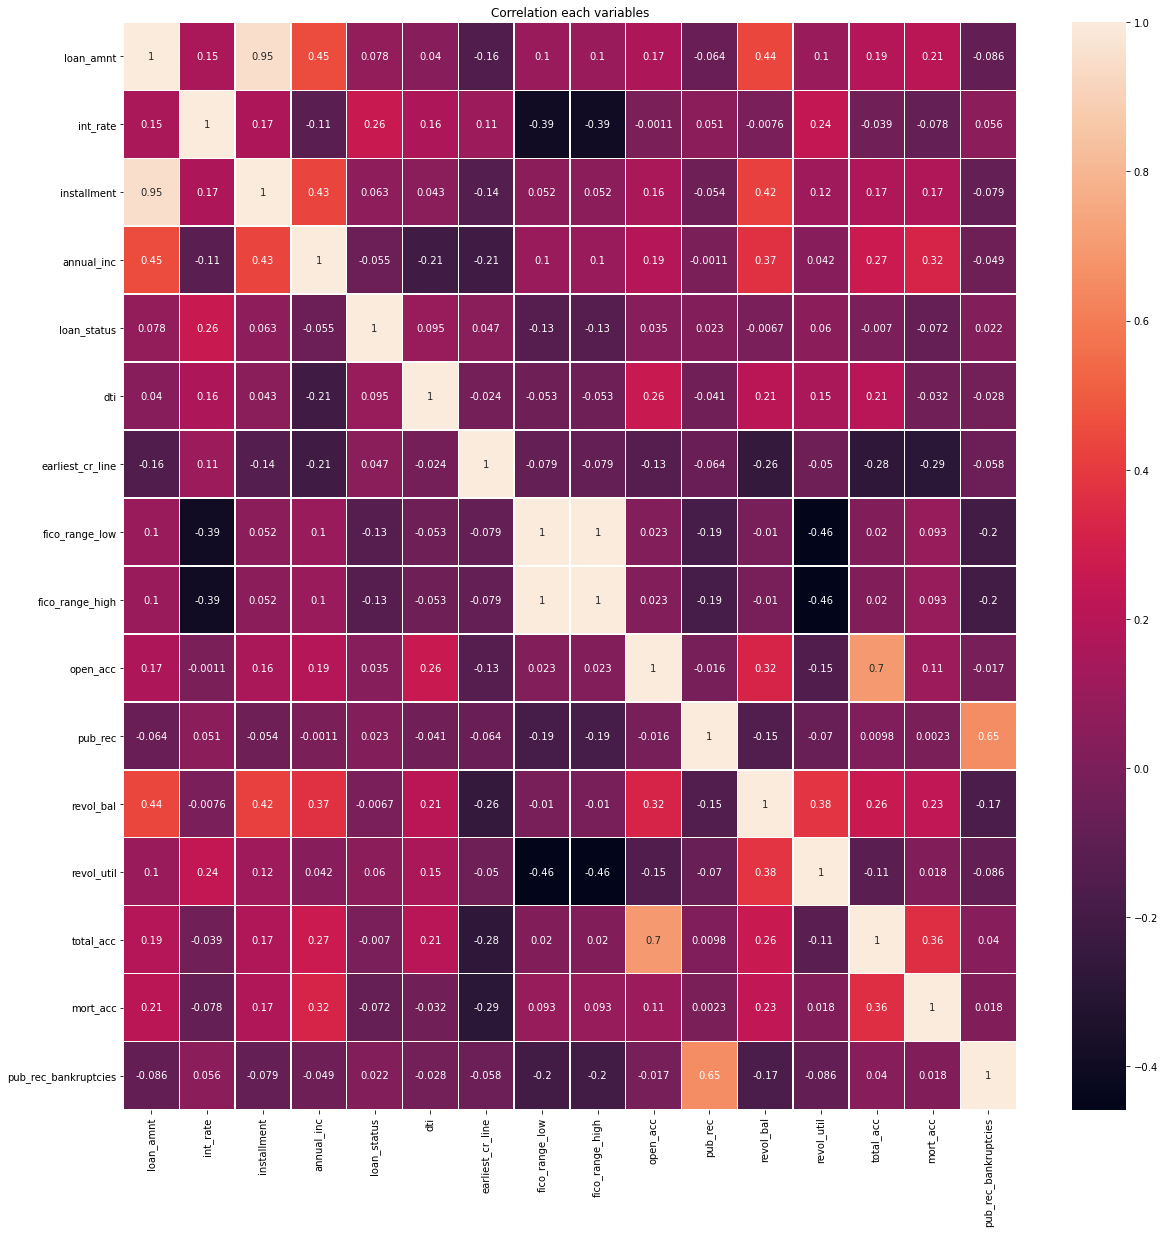

In [31]:
corr = df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=0.5, ax =ax)
plt.title("Correlation each variables")

In [124]:
from sklearn import preprocessing
categorical = ['term','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state',\
              'initial_list_status','application_type']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

We found some multicollinearity. So we first used VIF to eliminate multicollinearity. But the results of VIF is not useful for accuracy of model. We decided to remove variables based on the results of correlation heat map which correlation is greater than 0.9.

In [126]:
X = df.drop(['loan_status','issue_d'],axis=1)
y=df['loan_status']

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features']=X.columns
vif=vif.sort_values('VIF Factor', ascending=False)
print(vif)

          VIF Factor              features
14 1710825954.279770       fico_range_high
13 1691717744.770759        fico_range_low
12      54451.920129      earliest_cr_line
0         246.604556             loan_amnt
2         222.400384              int_rate
3         218.262325           installment
4          95.999130             sub_grade
15         13.269022              open_acc
19         13.137963             total_acc
18         10.399797            revol_util
1           9.807609                  term
7           8.677683            annual_inc
11          6.289736                   dti
17          5.049314             revol_bal
6           4.569881        home_ownership
10          3.365316            addr_state
8           2.962666   verification_status
22          2.763170              mort_acc
20          2.706551   initial_list_status
9           2.597937               purpose
5           2.326211            emp_length
23          2.047224  pub_rec_bankruptcies
16         

In [128]:
def multicollinearity(df):
    vif_data = pd.DataFrame()
    vif_data['IndependVariables'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                       for i in range(len(df.columns))]
    vif_data = vif_data.sort_values('VIF', ascending = False)
    #print(vif_data)
    while vif_data['VIF'].iloc[0] > 10:
        maxName = vif_data.iloc[0]
        #print(maxName)
        #vif_data = vif_data.iloc[1:,:]
        df = df.drop([maxName.IndependVariables],axis = 1)
        vif_data = pd.DataFrame()
        vif_data['IndependVariables'] = df.columns
        vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                           for i in range(len(df.columns))]
        vif_data = vif_data.sort_values('VIF', ascending = False)
        print(vif_data)
    return df

In [129]:
X_new=multicollinearity(X)

       IndependVariables         VIF
12      earliest_cr_line 1018.419139
13        fico_range_low  856.605996
0              loan_amnt  246.600329
2               int_rate  222.384504
3            installment  218.258231
4              sub_grade   95.982902
14              open_acc   13.233228
18             total_acc   12.886205
17            revol_util   10.342497
1                   term    9.807564
7             annual_inc    8.674498
11                   dti    6.288731
16             revol_bal    5.007036
6         home_ownership    4.569802
10            addr_state    3.365256
8    verification_status    2.962530
21              mort_acc    2.741897
19   initial_list_status    2.702992
9                purpose    2.597926
5             emp_length    2.319273
22  pub_rec_bankruptcies    2.043177
15               pub_rec    2.005011
20      application_type    1.078744
       IndependVariables        VIF
0              loan_amnt 246.006371
2               int_rate 217.659272
3   

In [130]:
X1_new=df.drop(['loan_status','issue_d','loan_amnt','sub_grade','fico_range_low'],axis=1)

In [131]:
X1_new.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_high', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

### Check the balance

Text(0.5, 1.0, 'Check the balance')

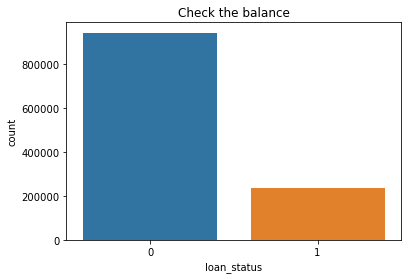

In [132]:
sns.countplot(x='loan_status',data=df)
plt.title('Check the balance')

In [133]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X1_new, y, test_size = 0.2, random_state=42)

#### Balance data

In [43]:
from collections import Counter
from imblearn.combine import SMOTETomek

SMOTE + TOMEK is a hybrid technology that can eliminate overlapping data for each category distributed in the sample space. If only SMOTE is used for oversampling, each category will overlap with each other, so the classifier model may overfit. Therefore, our group decided to apply the Tomek link to the over-sampling minority samples conducted by SMOTE. Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

In [44]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the dataset
st = SMOTETomek(random_state = 42)
X_train_st,y_train_st = st.fit_resample(X_train,y_train)
countera = Counter(y_train_st)
print('After',countera)

Before Counter({0: 753456, 1: 187323})
After Counter({0: 719022, 1: 719022})


In [146]:
from imblearn.under_sampling import NearMiss
counter1 = Counter(y_train)
print(counter1)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train_st,y_train_st = undersample.fit_resample(X_train,y_train)
# summarize the new class distribution
counter2 = Counter(y_train_st)
print(counter2)

Counter({0: 753456, 1: 187323})
Counter({0: 187323, 1: 187323})


###  Scaling data


Based on the distribution of data where mean is 0 and standard deviation is 1. Considering the category data changed into integer, we need to scale the data to get better performance.


In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler = StandardScaler()
X_st_train = scaler.fit_transform(X_train_st)
X_st_test=scaler.fit_transform(X_test)

In [149]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.000000,0,13.990000,123.030000,13,1,1,55000.000000,0,2015-12-01,0,2,38,5.910000,2003,675.000000,679.000000,7.000000,0.000000,2765.000000,29.700000,13.000000,1,0,1.000000,0.000000
1,24700.000000,0,11.990000,820.280000,10,1,1,65000.000000,0,2015-12-01,0,11,41,16.060000,1999,715.000000,719.000000,22.000000,0.000000,21470.000000,19.200000,38.000000,1,0,4.000000,0.000000
2,20000.000000,1,10.780000,432.660000,8,1,1,63000.000000,0,2015-12-01,0,4,14,10.780000,2000,695.000000,699.000000,6.000000,0.000000,7869.000000,56.200000,18.000000,1,1,5.000000,0.000000
4,10400.000000,1,22.450000,289.910000,25,3,1,104433.000000,1,2015-12-01,0,6,38,25.370000,1998,695.000000,699.000000,12.000000,0.000000,21929.000000,64.500000,35.000000,1,0,6.000000,0.000000
5,11950.000000,0,13.440000,405.180000,12,4,5,34000.000000,1,2015-12-01,0,2,10,10.200000,1987,690.000000,694.000000,5.000000,0.000000,8822.000000,68.400000,6.000000,1,0,0.000000,0.000000


## Model

Classification model: Logistic Regression, Random Forest, Gradient Boosting, KNN

### Logistic regression

In [150]:
log_model= sm.Logit(y_train_st,X_st_train, random_state=42)
result= log_model.fit()
print(result.summary(xname=['term','int_rate','installment','emp_length','home_ownership','annual_inc',\
                            'verification_status','purpose','addr_state','dti','earliest_cr_line',\
                            'fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc',\
                            'initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']))

Optimization terminated successfully.
         Current function value: 0.572049
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               374646
Model:                          Logit   Df Residuals:                   374625
Method:                           MLE   Df Model:                           20
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.1747
Time:                        00:20:31   Log-Likelihood:            -2.1432e+05
converged:                       True   LL-Null:                   -2.5968e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
term                     0.1250      0.004     28.264      0.000       0.116       0.134

In [151]:
model_Log= LogisticRegression(random_state=42)
model_Log.fit(X_st_train,y_train_st)
y_pred=model_Log.predict(X_st_test)
accuracy_train = round(model_Log.score(X_st_train,y_train_st) * 100, 2)
print(accuracy_train)
accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
print(accuracy_test)

69.85
57.29


              precision    recall  f1-score   support

           0       0.85      0.56      0.68    188277
           1       0.26      0.61      0.36     46918

    accuracy                           0.57    235195
   macro avg       0.55      0.59      0.52    235195
weighted avg       0.73      0.57      0.62    235195



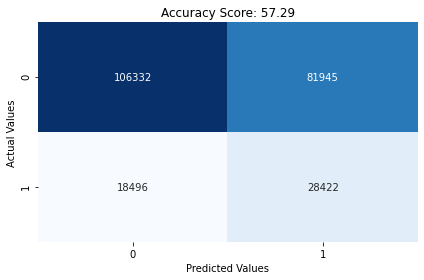

In [152]:
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test, size = 15))
plt.tight_layout()
plt.show()


Feature:0, Score: 0.12423
Feature:1, Score: 0.57949
Feature:2, Score: 0.20459
Feature:3, Score: -0.00049
Feature:4, Score: 0.13463
Feature:5, Score: 0.46928
Feature:6, Score: 0.11629
Feature:7, Score: 0.11906
Feature:8, Score: 0.01888
Feature:9, Score: 0.18313
Feature:10, Score: -0.03651
Feature:11, Score: 0.15697
Feature:12, Score: 0.04410
Feature:13, Score: 0.02158
Feature:14, Score: 0.44069
Feature:15, Score: -0.06444
Feature:16, Score: -0.00626
Feature:17, Score: 0.06546
Feature:18, Score: 0.04596
Feature:19, Score: -0.05491
Feature:20, Score: -0.00616


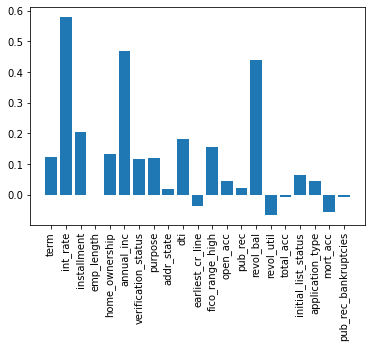

In [153]:
# get feature importance
importance = model_Log.coef_[0]
for i,v in enumerate(importance):
    print('Feature:%0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['term','int_rate','installment','emp_length','home_ownership','annual_inc','verification_status','purpose','addr_state','dti','earliest_cr_line','fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies'],rotation=90)
plt.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [154]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

### Random Forest

In [155]:
rf_model= RandomForestClassifier(n_jobs=-1, max_features='sqrt',n_estimators=30,oob_score=True,random_state=42)
rf_model.fit(X_st_train,y_train_st)
y_pred_random = rf_model.predict(X_st_test)
accuracy_random=rf_model.score(X_st_train,y_train_st)
print(accuracy_random)
accuracy_test_random=rf_model.score(X_st_test,y_test)
print(accuracy_test_random)

0.9992686429322614
0.5273836603669295


In [156]:
param_grid={'n_estimators':[5,10,20,30,40],'max_depth':[3,4,5]}
model_rf= GridSearchCV(estimator=rf_model,param_grid=param_grid, cv=5)
model_rf.fit(X_st_train,y_train_st)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=30, n_jobs=-1,
                                              oob_score=True, random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [20, 30, 40]})

In [157]:
y_pred_rf=model_rf.predict(X_st_test)
accuracy_rf = round(model_rf.score(X_st_train, y_train_st) * 100, 2)
print(accuracy_rf,model_rf.best_params_)
accuracy_test_rf = round(model_rf.score(X_st_test,y_test) * 100, 2)
accuracy_test_rf

71.27 {'max_depth': 5, 'n_estimators': 20}


56.46

In [158]:
confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67    188277
           1       0.25      0.59      0.35     46918

    accuracy                           0.56    235195
   macro avg       0.55      0.57      0.51    235195
weighted avg       0.73      0.56      0.61    235195



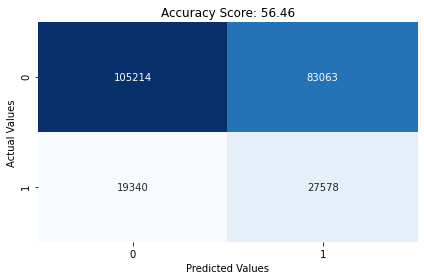

In [159]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_rf)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test_rf, size = 15))
plt.tight_layout()
plt.show()

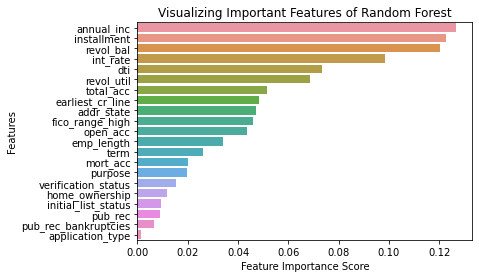

In [160]:
feature_imp = pd.Series(rf_model.feature_importances_, index = X1_new.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Random Forest")
plt.show()

#### Gradient Boosting

In [161]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [162]:
model_xgb=XGBClassifier(random_state=42)
model_xgb.fit(X_st_train,y_train_st)
print("Accuracy of train dataset={}".format(model_xgb.score(X_st_train,y_train_st)))
print("Accuracy of test dataset={}".format(model_xgb.score(X_st_test,y_test)))

Accuracy of train dataset=0.7992264697874794
Accuracy of test dataset=0.2499798039924318


In [163]:
param_grid_xgb = {'max_depth': [2,3,4,5],'min_child_weight': [0.001,0.01,0.1,0.5],\
                  'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],\
                  'colsample_bytree':[i/10.0 for i in range(6,11)],'n_estimators': [100, 200, 300, 1000]}
xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid_xgb, cv = 3, n_jobs = -1, verbose = 2)
xgb.fit(X_st_train,y_train_st)
print("Accuracy::{}".format(xgb.best_score_))
print("Best Hyperparameters::\n{}".format(xgb.best_params_))

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 77.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 158.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 296.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 400.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 590.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 779.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 1025.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 1339.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 1635.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 1951.1min


KeyboardInterrupt: 

In [ ]:
y_pred_xgb=xgb.predict(X_st_test)
print("Accuracy of train dataset={}".format(xgb.score(X_st_train,y_train_st)))
print("Accuracy of test dataset={}".format(xgb.score(X_st_test,y_test)))

In [ ]:
# get importance
importance_xgb = xgb.feature_importances_
# summarize feature importance
plt.subplots(figsize=(9,8))
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_xgb))], importance_rf)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['term','int_rate','installment','emp_length','home_ownership','annual_inc','verification_status','purpose','addr_state','dti','earliest_cr_line','fico_range_high','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies'],rotation=90)
plt.show();

### Result

In [ ]:
Logit_roc_auc = roc_auc_score(y_test, model_Log.predict_proba(X_test)[:,1])
fpLR,tpLR,thresholdsLR = roc_curve(y_test, model_Log.predict_proba(X_test)[:,1])
random_forest_roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
gradient_boosting_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
#knn_roc_auc = roc_auc_score(y_test, knn_final.predict_proba(X_test)[:,1])
#fpr,tpr,thresholds = roc_curve(y_test, knn_final.predict_proba(X_test)[:,1])
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpLR,tpLR,label='Logistic Regression(area=%0.2f)'% Logit_roc_auc)
plt.plot(fprrf, tprrf, label= 'Random Forest(area=%0.2f)'% random_forest_roc_auc)
plt.plot(fprgb, tprgb, label= 'Gradient Boosting(area=%0.2f)'% gradient_boosting_roc_auc)
#plt.plot(fpr,tpr,label='KNN(area=%0.2f)'% knn_roc_auc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()